In [1]:
import pandas as pd
import numpy as np


In [2]:
#import necessary packages
from matplotlib import pyplot as plt
from numpy import mean
from numpy import std
from scipy.stats import sem
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [3]:
#Import the data --> this file represents only the train set
data = pd.read_csv("Train_set_CC.csv", encoding = "latin-1")
del data["Unnamed: 0"]
data.head()

,FV_D,FV_M,FV_DATE,VISIT_CODE,WP_ID,NAICS,RegCode,INDCode,HICCode,HICPerCode,E1524Code,E2554Code,E55pCode,ConCode,Claims_Code
0,29,6,2019-06-29,2019-06-29 2093649,2093649,812115,3,10,1,2,1,1,2,1,1
1,25,2,2019-02-25,2019-02-25 1095872,1095872,812330,2,10,2,2,1,1,2,4,1
2,19,6,2019-06-19,2019-06-19 2091294,2091294,812190,2,10,2,2,1,1,2,4,1
3,6,5,2019-05-06,2019-05-06 2029237,2029237,238990,4,4,5,5,2,2,2,1,3
4,25,10,2019-10-25,2019-10-25 2125435,2125435,236110,4,4,5,5,2,2,2,3,3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19070 entries, 0 to 19069
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FV_D         19070 non-null  int64 
 1   FV_M         19070 non-null  int64 
 2   FV_DATE      19070 non-null  object
 3   VISIT_CODE   19070 non-null  object
 4   WP_ID        19070 non-null  int64 
 5   NAICS        19070 non-null  int64 
 6   RegCode      19070 non-null  int64 
 7   INDCode      19070 non-null  int64 
 8   HICCode      19070 non-null  int64 
 9   HICPerCode   19070 non-null  int64 
 10  E1524Code    19070 non-null  int64 
 11  E2554Code    19070 non-null  int64 
 12  E55pCode     19070 non-null  int64 
 13  ConCode      19070 non-null  int64 
 14  Claims_Code  19070 non-null  int64 
dtypes: int64(13), object(2)
memory usage: 2.2+ MB


In [6]:
data.isnull().sum()

FV_D           0
FV_M           0
FV_DATE        0
VISIT_CODE     0
WP_ID          0
NAICS          0
RegCode        0
INDCode        0
HICCode        0
HICPerCode     0
E1524Code      0
E2554Code      0
E55pCode       0
ConCode        0
Claims_Code    0
dtype: int64

Split data into 70:30 train / test sets

In [7]:
#using the train set define the features (X) and target (y) --> using Claims_Code as dependent variable
#includes all features

X = data.drop(['FV_DATE', 'VISIT_CODE','Claims_Code'], axis=1)
y = data['Claims_Code']

print(list(X.columns.values))  #Features used in the model
print(X.shape, y.shape)
print(y.value_counts())

['FV_D', 'FV_M', 'WP_ID', 'NAICS', 'RegCode', 'INDCode', 'HICCode', 'HICPerCode', 'E1524Code', 'E2554Code', 'E55pCode', 'ConCode']
(19070, 12) (19070,)
4    4527
1    4089
2    4063
5    3377
3    3014
Name: Claims_Code, dtype: int64


In [6]:
#using the train set define the features (X) and target (y) --> using Claims_Code as dependent variable
#features identified during Feature Selection via RFE 1 -->  RegCode, INDCode, HICCode, E2554Code

X = data.drop(['FV_D', 'FV_M','FV_DATE', 'VISIT_CODE', 'WP_ID', 'NAICS', 'HICPerCode','E1524Code', 'E55pCode','ConCode','Claims_Code'], axis=1)
y = data['Claims_Code']

print(list(X.columns.values))  #Features used in the model
print(X.shape, y.shape)
print(y.value_counts())

['RegCode', 'INDCode', 'HICCode', 'E2554Code']


In [ ]:
#using the train set define the features (X) and target (y) --> using Claims_Code as dependent variable
#features identified during Feature Selection via chi^2 method -->  'WP_ID', 'NAICS','INDCode', 'HICCode', 'HICPerCode'
X = data.drop(['FV_D', 'FV_M', 'FV_DATE', 'VISIT_CODE', 'RegCode', 'E2554Code', 'E1524Code', 'E55pCode','ConCode', 'Claims_Code'], axis=1)
y = data['Claims_Code']

print(list(X.columns.values))  #Features used in the model
print(X.shape, y.shape)
print(y.value_counts())

In [8]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y,  train_size = .70, random_state = 23)

RANDOM FOREST MODEL

In [11]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [9]:
#configure the function for the Random Forest Model

cv = RepeatedKFold(n_splits=10, random_state=23)
RF_model = RandomForestClassifier()  #default of 100 trees
scorer = 'accuracy'
print(RF_model.fit(X_tr, y_tr))

RandomForestClassifier()


In [10]:
score = np.mean(cross_val_score(RF_model, X, y, scoring = 'accuracy', cv=cv))
print('Accuracy: %.3f' % score)

Accuracy: 1.000


In [11]:
#fine tuning parameters for the model --> maximum number of features, minimum number of samples in a leaf, number of estimators
from sklearn.model_selection import GridSearchCV

max_features = [X.shape[1]//3, 'sqrt', 'log2', 'auto']
min_samples_leaf = [1, 10, 30]
n_estimators = [50, 100, 300]
search_grid = {'n_estimators':n_estimators, 'max_features': max_features, 'min_samples_leaf': min_samples_leaf}
search_func = GridSearchCV(estimator=RF_model, param_grid=search_grid, scoring=scorer, cv=cv)

search_func.fit(X, y)
best_params = search_func.best_params_
best_score = search_func.best_score_

print('Best parameters: %s' % best_params)
print('Best accuracy: %.3f' % best_score)

Best parameters: {'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 50}
Best accuracy: 1.000


In [12]:
y_predicted = RF_model.predict(X_ts)

In [13]:
#Create confusion matrix

from sklearn.metrics import confusion_matrix
con_matx = confusion_matrix(y_ts, y_predicted)
print(con_matx)

[[1248    0    0    0    0]
 [   0 1210    0    0    0]
 [   0    0  902    0    0]
 [   0    0    0 1387    0]
 [   0    0    0    0  974]]


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_ts, y_predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1248
           2       1.00      1.00      1.00      1210
           3       1.00      1.00      1.00       902
           4       1.00      1.00      1.00      1387
           5       1.00      1.00      1.00       974

    accuracy                           1.00      5721
   macro avg       1.00      1.00      1.00      5721
weighted avg       1.00      1.00      1.00      5721



In [15]:
# create function to evaluate the Repeated k-fold model
def mod_eval(X, y, Reps):
    cv = RepeatedKFold(n_splits=10, n_repeats=Reps, random_state=23)
    model = RandomForestClassifier(random_state=23)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 

# configurations to test
Reps = range(1,11)
results = list()
for r in Reps:
    scores = mod_eval(X, y, r)
    print('Run -> %d mean=%.4f se=%.3f' % (r, mean(scores), stats.sem(scores)))
    results.append(scores)

Run -> 1 mean=1.0000 se=0.000
Run -> 2 mean=1.0000 se=0.000
Run -> 3 mean=1.0000 se=0.000
Run -> 4 mean=1.0000 se=0.000
Run -> 5 mean=1.0000 se=0.000
Run -> 6 mean=1.0000 se=0.000
Run -> 7 mean=1.0000 se=0.000
Run -> 8 mean=1.0000 se=0.000
Run -> 9 mean=1.0000 se=0.000
Run -> 10 mean=1.0000 se=0.000


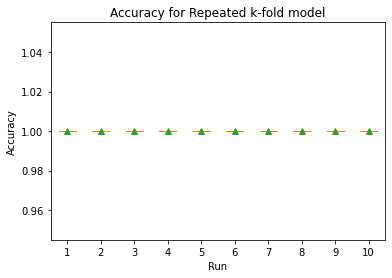

In [16]:
#plot the average accuracy for the Repeated k-fold model

plt.boxplot(results, labels=[str(r) for r in Reps], showmeans=True)
plt.title('Accuracy for Repeated k-fold model')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.show()


In [17]:
# create function to evaluate the Stratified repeated k-fold model
def mod_eval(X, y, Reps):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=Reps, random_state=23)
    model = RandomForestClassifier(random_state=23)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 

# configurations to test
Reps = range(1,11)
results = list()
for r in Reps:
    scores = mod_eval(X, y, r)
    print('Run -> %d mean=%.4f se=%.3f' % (r, mean(scores), stats.sem(scores)))
    results.append(scores)

Run -> 1 mean=1.0000 se=0.000
Run -> 2 mean=1.0000 se=0.000
Run -> 3 mean=1.0000 se=0.000
Run -> 4 mean=1.0000 se=0.000
Run -> 5 mean=1.0000 se=0.000
Run -> 6 mean=1.0000 se=0.000
Run -> 7 mean=1.0000 se=0.000
Run -> 8 mean=1.0000 se=0.000
Run -> 9 mean=1.0000 se=0.000
Run -> 10 mean=1.0000 se=0.000


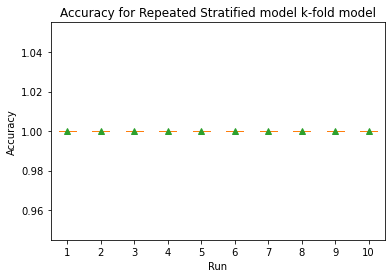

In [18]:
#plot the average accuracy stratified model

plt.boxplot(results, labels=[str(r) for r in Reps], showmeans=True)
plt.title('Accuracy for Repeated Stratified model k-fold model')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.show()
